In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


# О чем данные: расчетное потребление энергии в мегаваттах (МВт) каждый час. Данные подготовленны Duquesne Light Holdings, Inc. Энергия измерялась в Пенсильвании.

## Необработанные данные

In [2]:
db = 'DUQ_hourly.csv'
df = pd.read_csv(db, index_col=['Datetime'], parse_dates=['Datetime'], dayfirst=True)
df

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
...,...
2018-01-01 20:00:00,1962.0
2018-01-01 21:00:00,1940.0
2018-01-01 22:00:00,1891.0


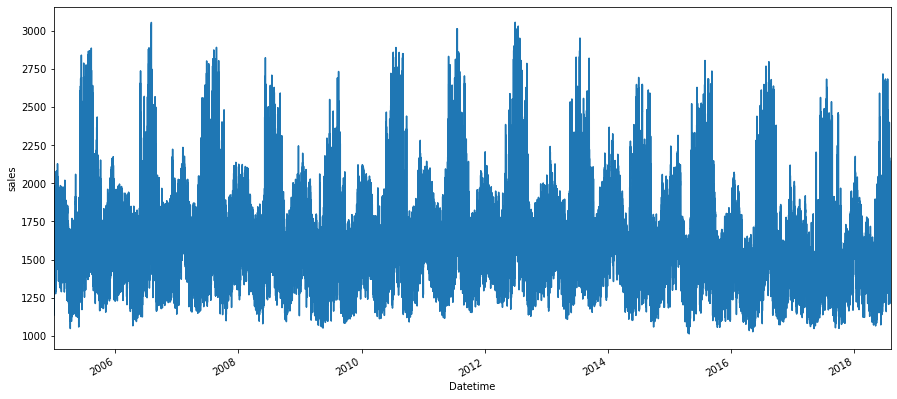

In [3]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [4]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


## Преобразуем по неделям

In [5]:
db = 'DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
...,...,...
119063,2018-01-01 20:00:00,1962.0
119064,2018-01-01 21:00:00,1940.0
119065,2018-01-01 22:00:00,1891.0
119066,2018-01-01 23:00:00,1820.0


In [6]:
df['date_minus_time'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date_minus_time"],inplace=True)
df

,Datetime,DUQ_MW,date_minus_time
date_minus_time,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [7]:
df = df.resample('W', on = 'date_minus_time').sum()
df

,DUQ_MW
date_minus_time,
2005-01-02,64069.0
2005-01-09,273052.0
2005-01-16,274529.0
2005-01-23,301980.0
2005-01-30,297042.0
...,...
2018-07-08,323737.0
2018-07-15,322957.0
2018-07-22,307617.0


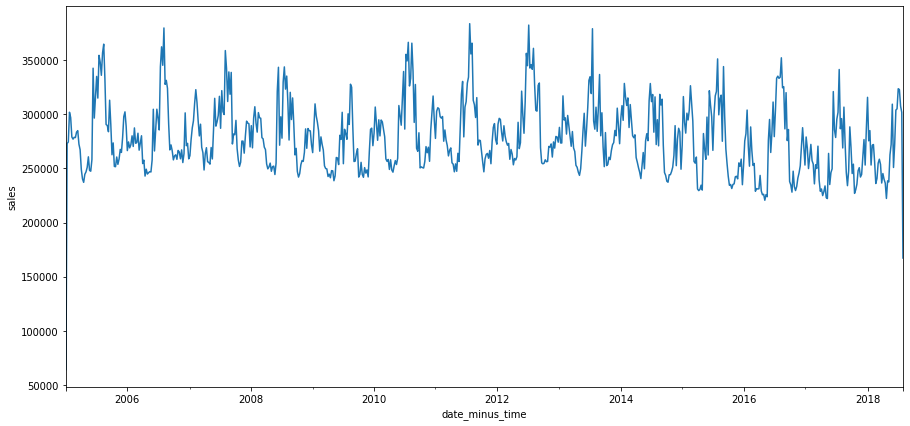

In [8]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [9]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


Оптимальный параметр преобразования Кокса- Бокса: 0.976499
 Критерий Дики-Фуллера: p=0.000000


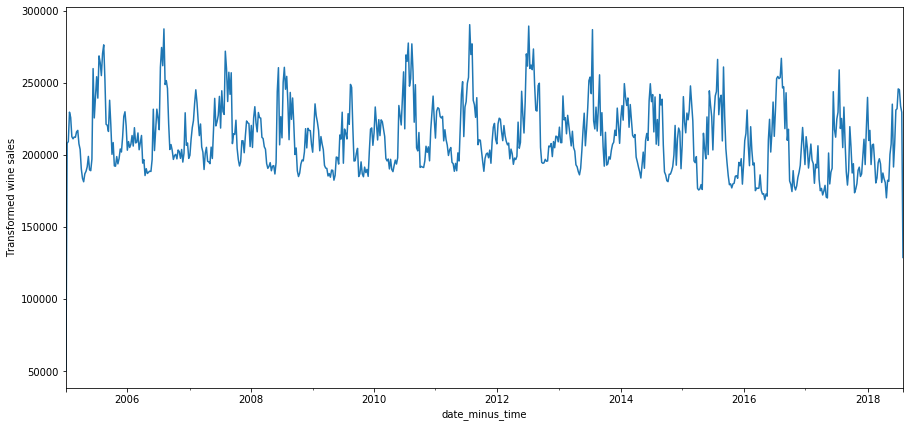

In [11]:
df['DUQ_MW'], lmbda = stats.boxcox(df['DUQ_MW'])
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel(u'Transformed wine sales')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

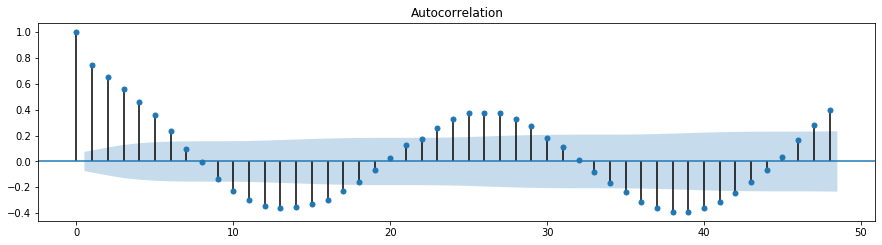

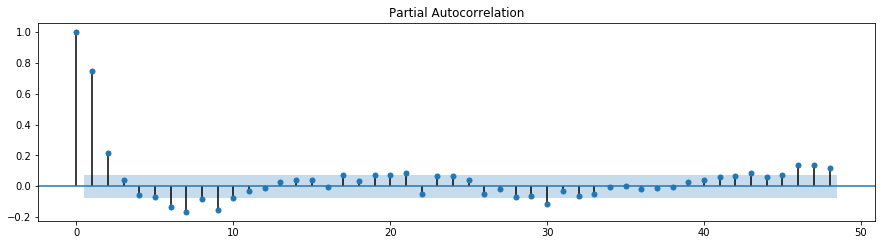

In [12]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

В автокоррекции номер последнего значимого сезонного лага Q = 4

Номер не сезонного значимого лага  q = 11

В частичной автокоррекции номер последнего значимого сезонного лага P = 4

Номер не сезонного значимого лага p = 10 

In [19]:
Qs = range(0, 5)
qs = range(0, 12)
Ps = range(0, 5)
ps = range(0, 11)
D = 1
d = 1

In [20]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

3300

In [21]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучаетс¤
    try:
        model=sm.tsa.statespace.SARIMAX(df['DUQ_MW'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохран¤ем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

KeyboardInterrupt: 

In [22]:
#сохранить в файл результаты
results

[[(0, 0, 0, 0), 16065.7593382717],
 [(0, 0, 0, 1), 15585.537634690667],
 [(0, 0, 0, 2), 15619.386875150705],
 [(0, 0, 0, 3), 15586.842977583865],
 [(0, 0, 0, 4), 15632.194511258127],
 [(0, 0, 1, 0), 15802.039514059417],
 [(0, 0, 1, 1), 15595.747726747002],
 [(0, 0, 1, 2), 15589.373959163513],
 [(0, 0, 1, 3), 15593.981509638255],
 [(0, 0, 1, 4), 15593.943980702848],
 [(0, 0, 2, 0), 15730.950652402196],
 [(0, 0, 2, 1), 15593.636513796155],
 [(0, 0, 2, 2), 15589.258886389205],
 [(0, 0, 2, 3), 15590.653871436414],
 [(0, 0, 2, 4), 15586.909171738323],
 [(0, 0, 3, 0), 15670.058390785936],
 [(0, 0, 3, 1), 15586.068266159062],
 [(0, 0, 3, 2), 15587.236614281617],
 [(0, 0, 3, 3), 15584.622262781082],
 [(0, 0, 3, 4), 15585.147739304626],
 [(0, 0, 4, 0), 15635.013607974479],
 [(0, 0, 4, 1), 15584.695186577603],
 [(0, 0, 4, 2), 15586.135742888824],
 [(0, 0, 4, 3), 15585.65675513735],
 [(0, 0, 4, 4), 15581.178570539552],
 [(0, 1, 0, 0), 16046.979519258824],
 [(0, 1, 0, 1), 15539.831121207691],
 [(0

In [25]:
len(results)
#обработал только 1/4, а времени потратил 12 часов...
#Лучше построю модель из того, что есть

770

In [55]:
import csv

writer = csv.writer(open("results.csv", 'w', newline = ''))
columns = ['ps', 'qs', 'Ps', 'Qs', 'aic']
writer.writerow(columns)
for row in results:
    arr = []
    arr.append(int(row[0][0]))
    arr.append(int(row[0][1]))
    arr.append(int(row[0][2]))
    arr.append(int(row[0][3]))
    arr.append(row[1])
    writer.writerow(arr)    

In [ ]:
ndf = pd.read_csv('results.csv')
ndf = ndf.dropna()
ndf.isna().sum()

In [65]:
ndf['ps'] = ndf['ps'].astype(int)
ndf['Qs'] = ndf['Qs'].astype(int)
ndf

,ps,qs,Ps,Qs,aic
0,0,0,0,0,16065.759338
1,0,0,0,1,15585.537635
2,0,0,0,2,15619.386875
3,0,0,0,3,15586.842978
4,0,0,0,4,15632.194511
...,...,...,...,...,...
765,2,6,3,0,15679.703754
766,2,6,3,1,15643.616889
767,2,6,3,2,15647.225773
768,2,6,3,3,15649.071180


In [71]:
print('best aic: {}, best model: {}, best param: {}'.format(best_aic, best_model, best_param))

best aic: 15533.168503411216, best model: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000167064D1A48>, best param: (1, 0, 0, 3)


 Критерий —Стьюдента: p=0.031627
 Критерий Дики-Фуллера: p=0.000000


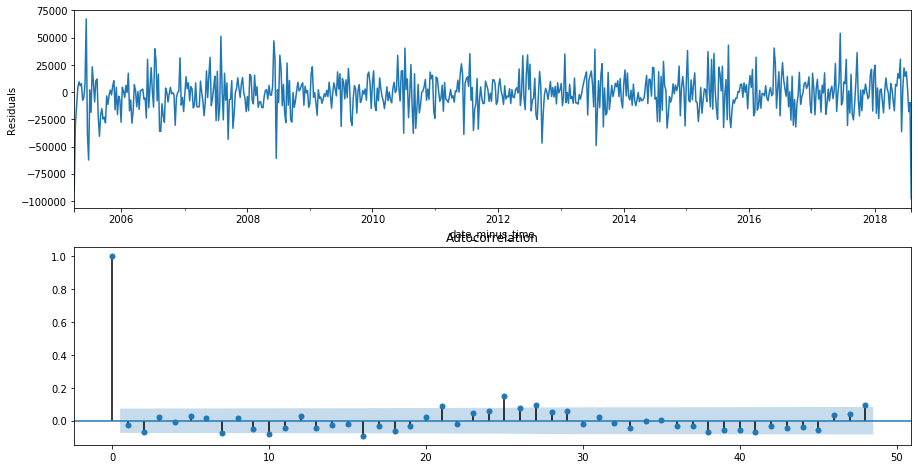

In [72]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print(" Критерий —Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

При проверке гипотез используют критерий Стьюдента, по нему можно судить о том, верно предоположение или нет.

Примерная интерпритация:

≥0,1Данные согласуются с нулевой гипотезой (H0), различия не подтверждены

#### ≥0,05Есть сомнения в истинности как нулевой (H0), так и альтернативной гипотез (H1)<0,05 Нулевая гипотеза (H0) может быть отвергнута.

≤0,01Нулевая гипотеза (H0) может быть отвергнута. Сильный аргумент

≤0,001Нулевая гипотеза (H0) наверняка не подтверждается. Очень сильный аргумент

Остатки СМЕЩЕНЫ (подтверждается критерием —Стьюдента) СТАЦИОНАРНЫ (подтверждается критерием Дики-Фуллера и визуально), неавтокоррелированы (подтверждается критерием Тьюнга-Кокса и коррелограммой). ѕосмотрим, насколько хорошо модель описывает данные:

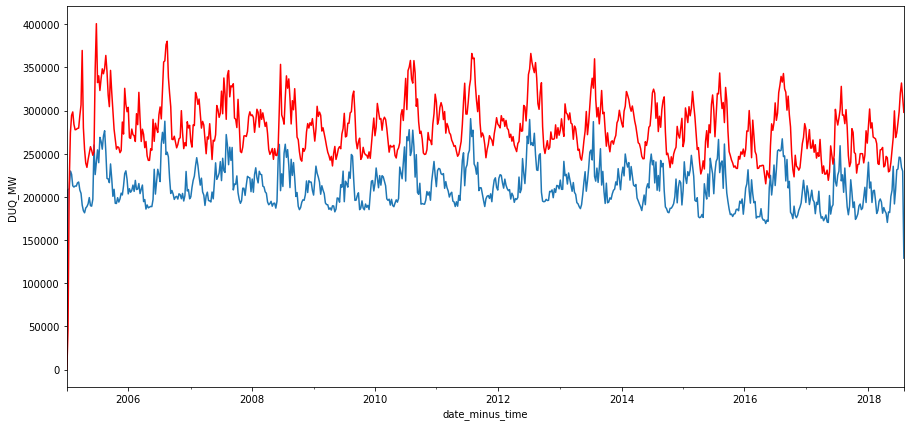

In [77]:
df['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
df.model[0:].plot(color='r')
plt.ylabel('DUQ_MW')
pylab.show()

<Figure size 1080x504 with 0 Axes>

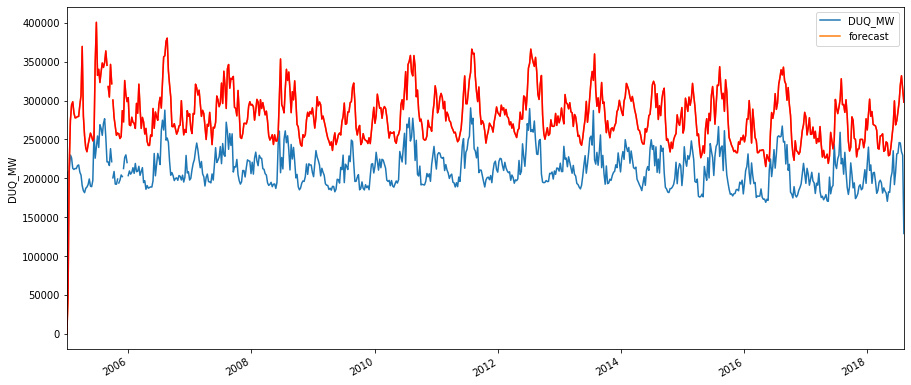

In [85]:
df2 = df[['DUQ_MW']]
date_list = [datetime.datetime.strptime("2005-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,5)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = invboxcox(best_model.predict(start=0, end=1500), lmbda)

plt.figure(figsize(15,7))
df2.plot()
df2.forecast.plot(color='r')
plt.ylabel('DUQ_MW')
pylab.show()

Выглядит хорошо, дисперсия не увеличивается, есть дельта, но прогнозу не мешает. Остатки стационарны, значит дельта в прогнозе не мешает отслеживанию реальных данных.